In [3]:
import os
import numpy as np
import pandas as pd

from astropy.io import ascii
from asterion import GlitchModel, Inference
from asterion.data import save

In [10]:
data_dir = 'data'

kic_ids = pd.read_csv(os.path.join(data_dir, 'kic_ids.csv'), dtype=object)
kic_ids

,KIC
0,10079226
1,10963065
2,3427720
3,3656476
4,3735871
5,5950854
6,6116048
7,6603624
8,6933899
9,7106245


In [5]:
table = ascii.read(os.path.join(data_dir, 'LEGACY/globals.dat'))
sample = table.to_pandas()

In [6]:
table = ascii.read(os.path.join(data_dir, 'LEGACY/modes.dat'))
modes = table.to_pandas()

In [13]:
sample = pd.merge(sample, kic_ids, on='KIC')
sample.head()

,KIC,Name,Kpmag,numax,Dnu,N,Cat,BkQ,MgQ,Teff,...,[Fe/H],e_[Fe/H],r_[Fe/H],logg,e_logg,E_logg,Vlos,e_Vlos,vsini,e_vsini
0,3427720,NaN,9.11,2737,120.1,36,Simple,5.1-17.2,NaN,6045,...,-0.06,0.1,<NA>,4.387,0.005,0.004,-22.91,0.1,2.9,0.5
1,3656476,Java,9.52,1925,93.2,38,Simple,5.1-17.2,"6, 10, 14",5668,...,0.25,0.1,<NA>,4.225,0.008,0.010,-13.29,0.1,2.3,0.5
2,3735871,NaN,9.71,2863,123.0,34,Simple,5.1-17.2,NaN,6107,...,-0.04,0.1,<NA>,4.396,0.007,0.007,6.90,0.1,4.8,0.5
3,5950854,NaN,10.96,1927,96.6,26,Simple,5.1-10.3,"6, 7.2",5853,...,-0.23,0.1,<NA>,4.238,0.007,0.007,-42.49,0.1,3.0,0.5
4,6116048,Nunny,8.42,2127,100.8,49,Simple,5.1-17.2,NaN,6033,...,-0.23,0.1,<NA>,4.254,0.009,0.012,-53.26,0.1,4.0,0.5


In [16]:
modes = pd.merge(modes, kic_ids, on='KIC')
modes.head()

,KIC,n,l,Freq,e_Freq,E_Freq,Amp,e_Amp,E_Amp,Width,e_Width,E_Width,l_lnK,lnK
0,3427720,14,0,1848.95209,3.90222,2.74391,0.05466,0.05457,0.58823,0.50386,0.50136,4.01763,NaN,1.15
1,3427720,14,2,1958.69559,0.32843,0.29630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.58
2,3427720,15,0,1969.86022,0.16052,0.16326,1.15074,0.13446,0.13505,0.89937,0.30060,0.38879,>,6.00
3,3427720,15,1,2025.18178,0.14036,0.15393,NaN,NaN,NaN,NaN,NaN,NaN,>,6.00
4,3427720,15,2,2077.46080,0.52205,0.76171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.16


In [20]:
kic = '3427720'
l = 0

star = modes.loc[(modes['KIC'] == kic) & (modes['l'] == l) & (modes['lnK'] == 6.0)]

In [21]:
star

,KIC,n,l,Freq,e_Freq,E_Freq,Amp,e_Amp,E_Amp,Width,e_Width,E_Width,l_lnK,lnK
2,3427720,15,0,1969.86022,0.16052,0.16326,1.15074,0.13446,0.13505,0.89937,0.30060,0.38879,>,6.0
5,3427720,16,0,2088.92117,0.24267,0.24456,1.07190,0.12510,0.14824,1.19827,0.50074,0.46337,>,6.0
8,3427720,17,0,2207.58420,0.37512,0.38255,1.40014,0.12445,0.12326,2.13366,0.42203,0.52639,>,6.0
11,3427720,18,0,2325.38218,0.17003,0.16521,1.77621,0.08953,0.11888,1.76327,0.28525,0.25023,>,6.0
14,3427720,19,0,2444.43709,0.12815,0.12257,2.11847,0.10558,0.09716,1.35587,0.19046,0.21175,>,6.0
17,3427720,20,0,2564.45419,0.14544,0.15071,2.39492,0.10249,0.10577,1.84648,0.18052,0.22329,>,6.0
20,3427720,21,0,2684.63904,0.09455,0.09110,2.61268,0.09990,0.09894,1.29952,0.14338,0.15617,>,6.0
23,3427720,22,0,2804.40730,0.15773,0.16206,2.69762,0.10447,0.10260,2.30045,0.18431,0.25658,>,6.0
26,3427720,23,0,2924.94417,0.18705,0.18978,2.32765,0.10757,0.10031,2.14014,0.29725,0.23860,>,6.0
29,3427720,24,0,3044.54187,0.28624,0.30790,2.17889,0.10569,0.10000,3.08006,0.37485,0.49397,>,6.0


In [26]:
n = star['n'].to_numpy()
nu = star['Freq'].to_numpy()
nu_err = np.maximum(star['e_Freq'], star['E_Freq']).to_numpy()

In [37]:
mu_delta_nu = sample.loc[sample['KIC'] == kic, 'Dnu'][0]
delta_nu = [mu_delta_nu, 0.01*mu_delta_nu]

mu_nu_max = sample.loc[sample['KIC'] == kic, 'numax'][0]
nu_max = [mu_nu_max, 0.05*mu_nu_max]

In [126]:
model = GlitchModel(f'KIC {kic}', delta_nu=delta_nu, nu_max=nu_max, nu=nu, nu_err=nu_err, n=n)

In [127]:
infer = Inference(model, num_warmup=2000, num_samples=2000, seed=42)

In [47]:
infer.prior_predictive()

In [48]:
import arviz as az

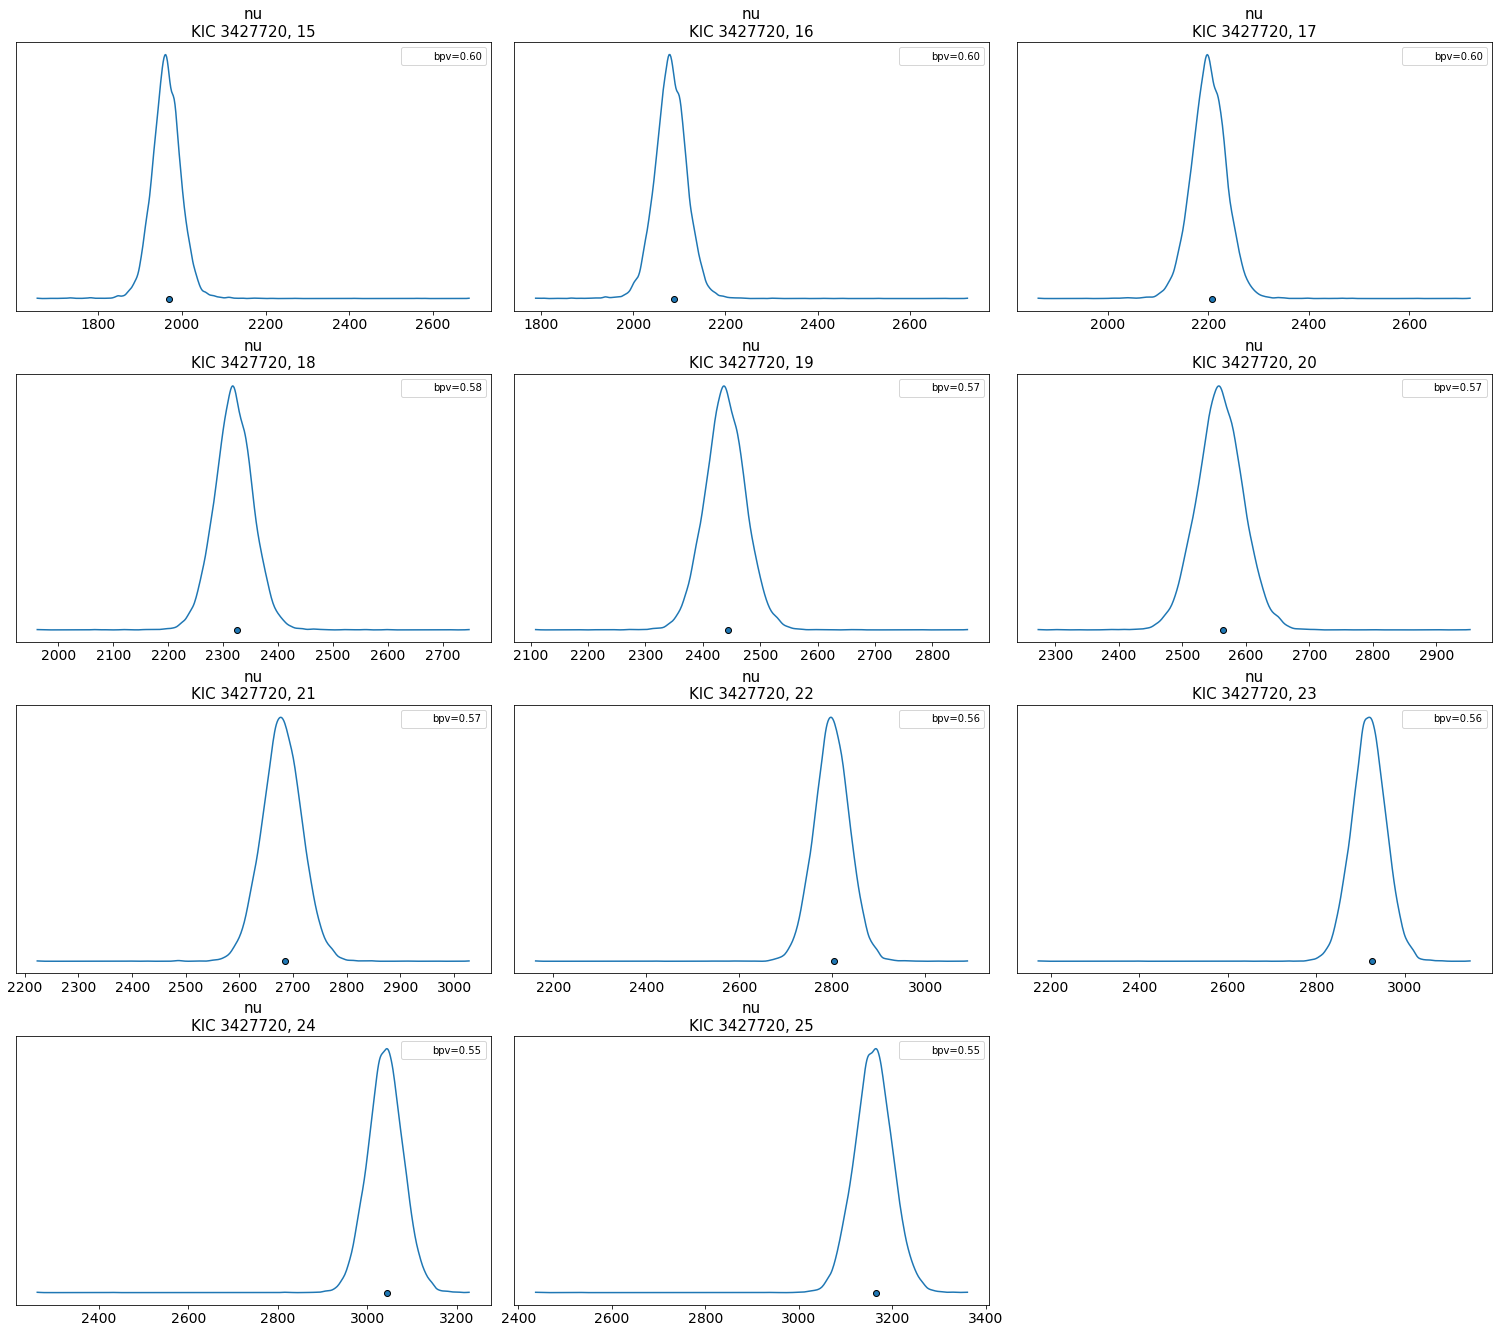

In [49]:
az.plot_bpv(infer.data, var_names=['nu'], group='prior', kind='t_stat', flatten=['chain', 'draws']);

In [128]:
import numpyro

from numpyro.infer import Trace_ELBO, SVI, init_to_median
from numpyro.infer.autoguide import AutoDiagonalNormal
from numpyro.optim import Adam
from numpyro.infer.reparam import NeuTraReparam
from numpyro import handlers

from jax import random

In [130]:
posterior = handlers.reparam(model._posterior, model.reparam)

guide = numpyro.infer.autoguide.AutoDiagonalNormal(
    posterior,
    init_loc_fn=lambda site=None: init_to_median(site=site, num_samples=1000)
)

optim = Adam(step_size=1e-3)
loss = Trace_ELBO()
svi = SVI(posterior, guide, optim, loss)

In [131]:
rng_key, infer._rng_key = random.split(infer._rng_key)

In [132]:
svi_result = svi.run(rng_key, 50000)

100%|██████████| 50000/50000 [00:15<00:00, 3255.57it/s, init loss: 5167.0546, avg. loss [47501-50000]: -499.1708]


In [133]:
neutra = NeuTraReparam(guide, svi_result.params)

In [134]:
model._posterior = neutra.reparam(posterior)

In [135]:
infer.sample()

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

In [137]:
var_names = ['delta_nu', 'nu_max', 'epsilon', 'alpha', 
             'b0', 'b1', 'tau_he', 'phi_he', 
             'c0', 'tau_cz', 'phi_cz', 'err']

In [ ]:
for k, v in 

In [83]:
del infer._data.posterior['auto_shared_latent']

In [97]:
infer._data.dims

{'epsilon': ['name'],
 'alpha': ['name'],
 'delta_nu': ['name'],
 'nu_max': ['name'],
 'b0': ['name'],
 'b1': ['name'],
 'tau_he': ['name'],
 'phi_he': ['name'],
 'c0': ['name'],
 'delta_tau': ['name'],
 'tau_cz': ['name'],
 'phi_cz': ['name'],
 'err': ['name'],
 'nu_asy': ['name', 'n'],
 'dnu_he': ['name', 'n'],
 'dnu_cz': ['name', 'n'],
 'nu': ['name', 'n'],
 'nu_obs_observed': ['name', 'n'],
 'nu_obs_unobserved': ['name', 'n'],
 'nu_obs': ['name', 'n']}

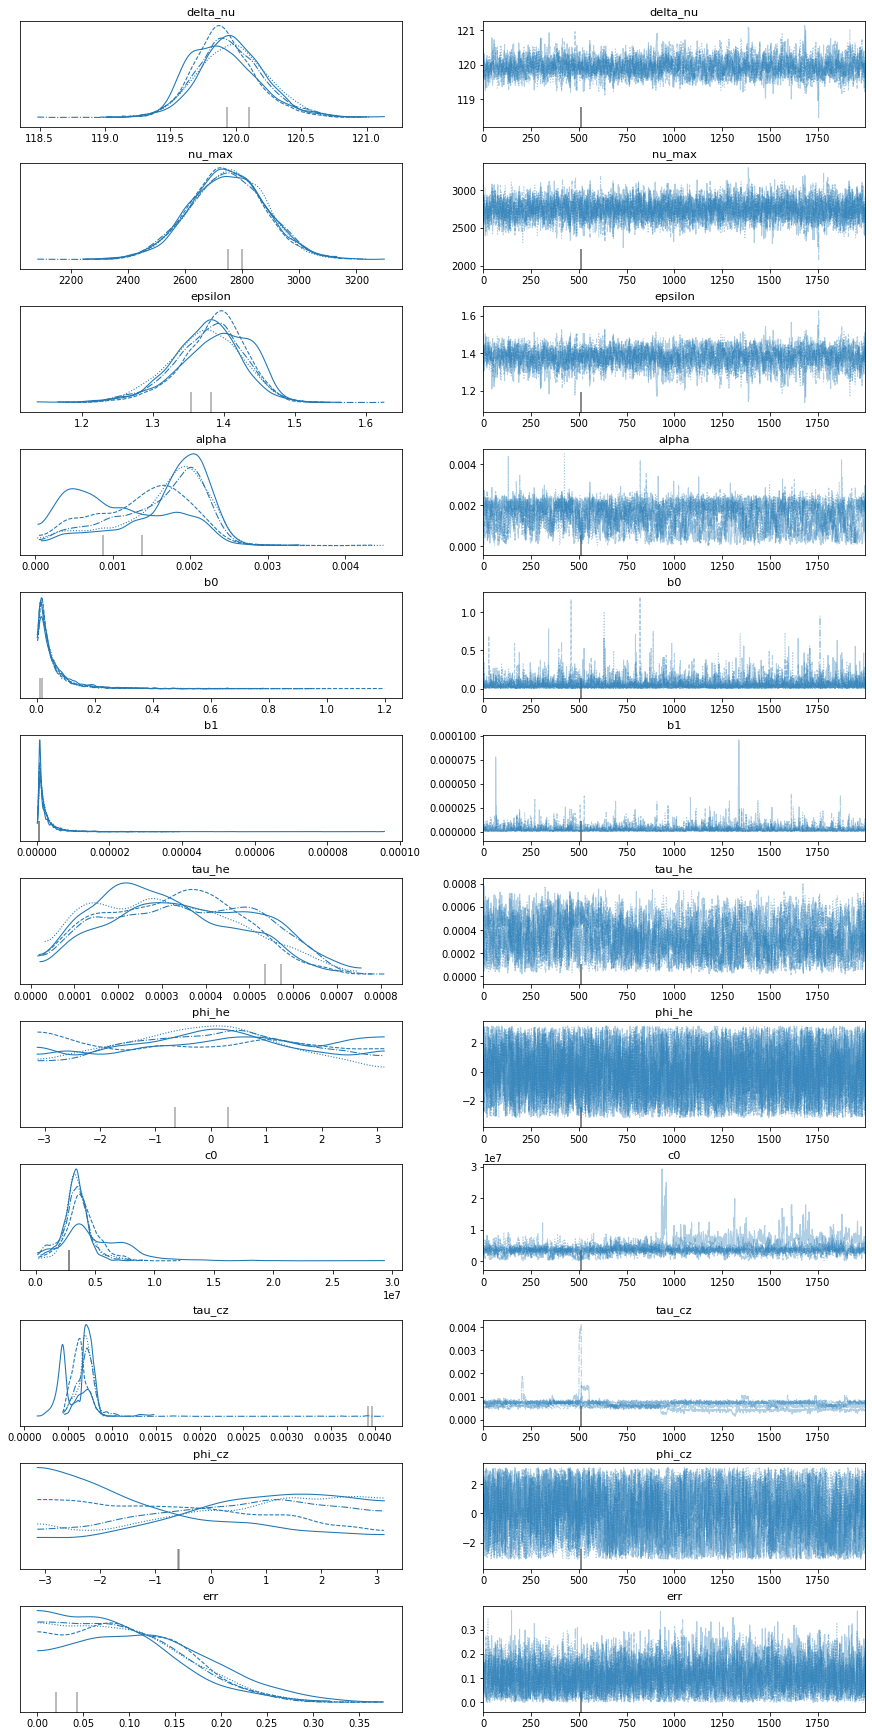

In [125]:
az.plot_trace(infer.data, var_names=var_names);